# Fat consumption per capita

In [2]:
import pandas as pd

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from constants.countries import highincome_countries
from src import generate_high_income_global_avg_index
from src.plotting import plot_value_per_year_GER_HIC_GLO

%load_ext autoreload

## Load data

In [3]:
DATA_PATH = "../data/final/"
# OUTPUT_PATH = "output/" # if you want to save the plots
OUTPUT_PATH = "../doc/IHD_germany_2024/fig/"
alcohol_data_path = DATA_PATH + "daily_per_capita_fat_supply_final.csv"
VALUE_COLUMN_NAME = "Value"
YEAR_COLUMN_NAME = "Year"

In [4]:
df = pd.read_csv(alcohol_data_path)
df

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Fat consumption per day per capita (grams),1961,38.209236
1,Afghanistan,AFG,Fat consumption per day per capita (grams),1962,38.335213
2,Afghanistan,AFG,Fat consumption per day per capita (grams),1963,39.338820
3,Afghanistan,AFG,Fat consumption per day per capita (grams),1964,39.747234
4,Afghanistan,AFG,Fat consumption per day per capita (grams),1965,40.560085
...,...,...,...,...,...
12355,Zimbabwe,ZWE,Fat consumption per day per capita (grams),2016,66.536940
12356,Zimbabwe,ZWE,Fat consumption per day per capita (grams),2017,62.848648
12357,Zimbabwe,ZWE,Fat consumption per day per capita (grams),2018,64.250500
12358,Zimbabwe,ZWE,Fat consumption per day per capita (grams),2019,56.008080


## Add 'Global' average and 'High-income countries' average

In [5]:
# Appending the average data to the original DataFrame
df = generate_high_income_global_avg_index(df)

# Display the last few rows to verify the appended averages
df

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Fat consumption per day per capita (grams),1961,38.209236
1,Afghanistan,AFG,Fat consumption per day per capita (grams),1962,38.335213
2,Afghanistan,AFG,Fat consumption per day per capita (grams),1963,39.338820
3,Afghanistan,AFG,Fat consumption per day per capita (grams),1964,39.747234
4,Afghanistan,AFG,Fat consumption per day per capita (grams),1965,40.560085
...,...,...,...,...,...
55,Global,GLB,NaN,2016,88.634241
56,Global,GLB,NaN,2017,89.560881
57,Global,GLB,NaN,2018,90.743918
58,Global,GLB,NaN,2019,93.035794


## Plot the result

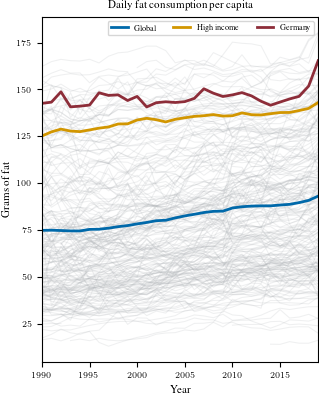

In [6]:
%autoreload 2

plot_value_per_year_GER_HIC_GLO(
    df[(df['Year']>=1990) & (df['Year']<=2019)], 
    xticks = 5,
    xlabel = 'Year',
    ylabel = "Grams of fat",
    title = "Daily fat consumption per capita")